In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('D:\\Downloads\\Supermart_Grocery_Sales.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [5]:
# Clean column names
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [6]:
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce', dayfirst=True)

# Extract time-based features
df['order_month'] = df['order_date'].dt.to_period('M')
df['order_year'] = df['order_date'].dt.year
df['order_day'] = df['order_date'].dt.day_name()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9994 non-null   object        
 1   customer_name  9994 non-null   object        
 2   category       9994 non-null   object        
 3   sub_category   9994 non-null   object        
 4   city           9994 non-null   object        
 5   order_date     4042 non-null   datetime64[ns]
 6   region         9994 non-null   object        
 7   sales          9994 non-null   int64         
 8   discount       9994 non-null   float64       
 9   profit         9994 non-null   float64       
 10  state          9994 non-null   object        
 11  order_month    4042 non-null   period[M]     
 12  order_year     4042 non-null   float64       
 13  order_day      4042 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8), period[M](1)
memo

In [9]:
#handling missing values

df = df[df['order_date'].notnull()]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4042 entries, 0 to 9991
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       4042 non-null   object        
 1   customer_name  4042 non-null   object        
 2   category       4042 non-null   object        
 3   sub_category   4042 non-null   object        
 4   city           4042 non-null   object        
 5   order_date     4042 non-null   datetime64[ns]
 6   region         4042 non-null   object        
 7   sales          4042 non-null   int64         
 8   discount       4042 non-null   float64       
 9   profit         4042 non-null   float64       
 10  state          4042 non-null   object        
 11  order_month    4042 non-null   period[M]     
 12  order_year     4042 non-null   float64       
 13  order_day      4042 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8), period[M](1)
memory us

In [59]:
df = df.drop(columns=['order_id', 'customer_name'])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   category      9994 non-null   object        
 1   sub_category  9994 non-null   object        
 2   city          9994 non-null   object        
 3   order_date    4042 non-null   datetime64[ns]
 4   region        9994 non-null   object        
 5   sales         9994 non-null   int64         
 6   discount      9994 non-null   float64       
 7   profit        9994 non-null   float64       
 8   state         9994 non-null   object        
 9   order_month   4042 non-null   period[M]     
 10  order_year    4042 non-null   float64       
 11  order_day     4042 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6), period[M](1)
memory usage: 937.1+ KB


In [8]:
df['order_dayofweek'] = df['order_date'].dt.dayofweek
df['order_month'] = df['order_date'].dt.month
df['order_year'] = df['order_date'].dt.year

In [9]:
df = df.drop(columns=['order_month', 'order_year', 'order_day'])


In [10]:
df = pd.get_dummies(df, columns=['category', 'sub_category', 'city', 'region', 'state'], drop_first=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 60 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   order_date                       4042 non-null   datetime64[ns]
 1   sales                            9994 non-null   int64         
 2   discount                         9994 non-null   float64       
 3   profit                           9994 non-null   float64       
 4   order_dayofweek                  4042 non-null   float64       
 5   category_Beverages               9994 non-null   bool          
 6   category_Eggs, Meat & Fish       9994 non-null   bool          
 7   category_Food Grains             9994 non-null   bool          
 8   category_Fruits & Veggies        9994 non-null   bool          
 9   category_Oil & Masala            9994 non-null   bool          
 10  category_Snacks                  9994 non-null   bool       

In [11]:
X = df.drop('sales', axis=1)
y = df['sales']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
X_train.dtypes.value_counts()

bool              55
float64            3
object             2
datetime64[ns]     1
Name: count, dtype: int64

In [14]:
X_train = X_train.drop(columns=['order_date'], errors='ignore')
X_test = X_test.drop(columns=['order_date'], errors='ignore')

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [26]:
# Drop columns with non-numeric data
X_train = X_train.select_dtypes(include=['int64', 'float64'])


In [27]:
# Drop or fill missing values
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
print(X_train.shape)

(7995, 61)


In [22]:
print(y_train.shape)

(7995,)


In [23]:
print(X_train.isnull().sum().sum())
print(y_train.isnull().sum())

9554
0


In [31]:
X_test = X_test.dropna()

In [33]:
# Assuming you already did this for training:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

In [35]:
print(X_train.columns.tolist())
print(X_test.columns.tolist())

['discount', 'profit', 'order_dayofweek']
['order_id', 'customer_name', 'order_date', 'discount', 'profit', 'order_dayofweek', 'category_Beverages', 'category_Eggs, Meat & Fish', 'category_Food Grains', 'category_Fruits & Veggies', 'category_Oil & Masala', 'category_Snacks', 'sub_category_Biscuits', 'sub_category_Breads & Buns', 'sub_category_Cakes', 'sub_category_Chicken', 'sub_category_Chocolates', 'sub_category_Cookies', 'sub_category_Dals & Pulses', 'sub_category_Edible Oil & Ghee', 'sub_category_Eggs', 'sub_category_Fish', 'sub_category_Fresh Fruits', 'sub_category_Fresh Vegetables', 'sub_category_Health Drinks', 'sub_category_Masalas', 'sub_category_Mutton', 'sub_category_Noodles', 'sub_category_Organic Fruits', 'sub_category_Organic Staples', 'sub_category_Organic Vegetables', 'sub_category_Rice', 'sub_category_Soft Drinks', 'sub_category_Spices', 'city_Chennai', 'city_Coimbatore', 'city_Cumbum', 'city_Dharmapuri', 'city_Dindigul', 'city_Kanyakumari', 'city_Karur', 'city_Krishna

In [37]:

X_test_selected = X_test[['discount', 'profit', 'order_dayofweek']]


In [38]:
# Step 2: Impute missing values (if needed)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_selected), columns=['discount', 'profit', 'order_dayofweek'])


In [42]:
# Step 3: Predict
y_pred = model.predict(X_test_imputed)

In [44]:
print(len(y_test))
print(len(y_pred))

1999
824


In [43]:
import pandas as pd

results = pd.DataFrame({
    'Actual Sales': y_test.values,
    'Predicted Sales': y_pred
})

results.head(10)  # Show first 10 rows

ValueError: All arrays must be of the same length

In [26]:
X_test_reset = X_test.reset_index(drop=True)
comparison = pd.concat([X_test_reset, results], axis=1)
comparison.head(10)

,discount,profit,order_dayofweek,category_Beverages,"category_Eggs, Meat & Fish",category_Food Grains,category_Fruits & Veggies,category_Oil & Masala,category_Snacks,sub_category_Biscuits,...,city_Trichy,city_Vellore,city_Viluppuram,city_Virudhunagar,region_East,region_North,region_South,region_West,Actual Sales,Predicted Sales
0,0.30,279.02,2,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,1993,1315.97
1,0.25,442.08,5,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,1228,1510.92
2,0.25,717.17,0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,2473,2059.21
3,0.11,334.56,4,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,2091,1806.68
4,0.27,604.50,2,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2015,1919.16
5,0.10,399.90,6,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,930,1851.19
6,0.24,318.30,1,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,1061,1524.73
7,0.24,70.00,6,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,700,819.33
8,0.21,608.00,2,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,1520,1928.02
9,0.17,319.50,0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,1278,1291.04


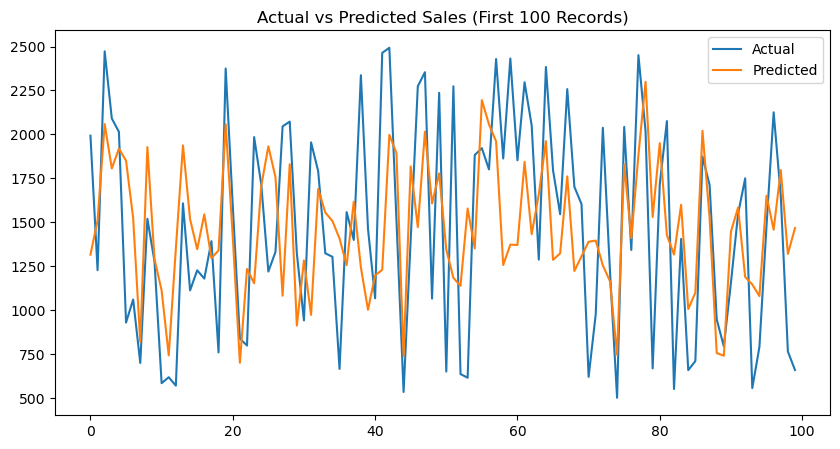

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(results['Actual Sales'].values[:100], label='Actual')
plt.plot(results['Predicted Sales'].values[:100], label='Predicted')
plt.title("Actual vs Predicted Sales (First 100 Records)")
plt.legend()
plt.show()

In [28]:
results.to_csv("sales_predictions.csv", index=False)

In [29]:
# Save original features before encoding
df_features = df.drop(columns=['sales'])
df_target = df['sales']

# Encode the features
X_encoded = pd.get_dummies(df_features, drop_first=True)

# Train/test split on encoded
X_train, X_test, y_train, y_test = train_test_split(X_encoded, df_target, test_size=0.2, random_state=42)

# Also split original (non-encoded) data
_, original_X_test = train_test_split(df_features, test_size=0.2, random_state=42)

In [34]:
y = df['sales']  # must be a Series, not DataFrame
print(type(y))   # should be <class 'pandas.core.series.Series'>
print(y.dtype)

<class 'pandas.core.series.Series'>
int64


In [43]:
y = df['sales']

In [36]:
print(X_encoded.dtypes.value_counts())

bool              55
float64            2
datetime64[ns]     1
int32              1
Name: count, dtype: int64


In [37]:
# 1. Drop datetime columns (e.g. 'order_date')
df_features_cleaned = df_features.drop(columns=['order_date'], errors='ignore')

# 2. Convert boolean columns to integers (0/1)
bool_cols = df_features_cleaned.select_dtypes(include='bool').columns
df_features_cleaned[bool_cols] = df_features_cleaned[bool_cols].astype(int)

# 3. One-hot encode categorical columns
X_encoded = pd.get_dummies(df_features_cleaned, drop_first=True)

# 4. Ensure only numeric data
X_encoded = X_encoded.select_dtypes(include=['int64', 'float64', 'uint8'])

# 5. Define the target variable
y = df['sales']

# 6. Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 7. Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [42]:
y_pred = model.predict(X_test)

In [39]:
import pandas as pd

results = pd.DataFrame({
    'Actual Sales': y_test.values,
    'Predicted Sales': y_pred
})

In [40]:
# Split original (non-encoded) features to align with test set
_, original_X_test = train_test_split(df_features, test_size=0.2, random_state=42)

# Combine original test features with results
full_results = pd.concat([original_X_test.reset_index(drop=True), results], axis=1)

full_results.head()

,order_date,discount,profit,order_dayofweek,category_Beverages,"category_Eggs, Meat & Fish",category_Food Grains,category_Fruits & Veggies,category_Oil & Masala,category_Snacks,...,city_Trichy,city_Vellore,city_Viluppuram,city_Virudhunagar,region_East,region_North,region_South,region_West,Actual Sales,Predicted Sales
0,2016-05-04,0.30,279.02,2,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,1993,1382.58
1,2016-01-09,0.25,442.08,5,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,1228,1534.19
2,2017-08-07,0.25,717.17,0,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,2473,1830.88
3,2018-02-02,0.11,334.56,4,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,2091,1634.70
4,2016-11-09,0.27,604.50,2,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2015,1664.18


In [46]:
print(df.columns.tolist())

['order_date', 'sales', 'discount', 'profit', 'order_dayofweek', 'category_Beverages', 'category_Eggs, Meat & Fish', 'category_Food Grains', 'category_Fruits & Veggies', 'category_Oil & Masala', 'category_Snacks', 'sub_category_Biscuits', 'sub_category_Breads & Buns', 'sub_category_Cakes', 'sub_category_Chicken', 'sub_category_Chocolates', 'sub_category_Cookies', 'sub_category_Dals & Pulses', 'sub_category_Edible Oil & Ghee', 'sub_category_Eggs', 'sub_category_Fish', 'sub_category_Fresh Fruits', 'sub_category_Fresh Vegetables', 'sub_category_Health Drinks', 'sub_category_Masalas', 'sub_category_Mutton', 'sub_category_Noodles', 'sub_category_Organic Fruits', 'sub_category_Organic Staples', 'sub_category_Organic Vegetables', 'sub_category_Rice', 'sub_category_Soft Drinks', 'sub_category_Spices', 'city_Chennai', 'city_Coimbatore', 'city_Cumbum', 'city_Dharmapuri', 'city_Dindigul', 'city_Kanyakumari', 'city_Karur', 'city_Krishnagiri', 'city_Madurai', 'city_Nagercoil', 'city_Namakkal', 'cit